In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

#api key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output CSV
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
#lists for storage
responses = []
city_id = []
city_name = []
cloud = []
country = []
date = []
hum = []
lat = []
lng = []
max_temp = []
wind_speed = []

r_num = 1
#build url and query_url
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        weather_data = requests.get(query_url)
        city_name.append(weather_data.json()['name'])
        cloud.append(weather_data.json()['clouds']['all'])
        country.append(weather_data.json()['sys']['country'])
        date.append(weather_data.json()['dt'])
        hum.append(weather_data.json()['main']['humidity'])
        lat.append(weather_data.json()['coord']['lat'])
        lng.append(weather_data.json()['coord']['lon'])
        max_temp.append(1.8 * ((weather_data.json()['main']['temp_max'])-273) + 32)
        wind_speed.append(weather_data.json()['wind']['speed'])
        print(f"Processing request number {r_num}:{city}")
        r_num = r_num + 1
    except KeyError:
        print("city not found. skipping...")


Processing request number 1:hobart
Processing request number 2:souillac
Processing request number 3:lompoc
Processing request number 4:gizo
Processing request number 5:cherskiy
city not found. skipping...
Processing request number 6:hami
Processing request number 7:hermanus
Processing request number 8:aklavik
Processing request number 9:hilo
Processing request number 10:albany
Processing request number 11:punta arenas
Processing request number 12:lieksa
Processing request number 13:manoel urbano
Processing request number 14:maymyo
Processing request number 15:castro
Processing request number 16:chokurdakh
Processing request number 17:rikitea
Processing request number 18:half moon bay
Processing request number 19:gat
Processing request number 20:ixtapa
Processing request number 21:chuy
Processing request number 22:saint-pierre
Processing request number 23:vao
Processing request number 24:faanui
Processing request number 25:mataura
Processing request number 26:athabasca
Processing reques

Processing request number 204:marsh harbour
Processing request number 205:mahebourg
Processing request number 206:padang
Processing request number 207:griffith
Processing request number 208:upernavik
Processing request number 209:sabha
Processing request number 210:bud
Processing request number 211:ribeira grande
Processing request number 212:sao felix do xingu
Processing request number 213:birao
Processing request number 214:kruisfontein
city not found. skipping...
Processing request number 215:kiruna
Processing request number 216:kemin
Processing request number 217:tamandare
Processing request number 218:severo-kurilsk
Processing request number 219:anjiang
Processing request number 220:airai
Processing request number 221:tartagal
Processing request number 222:codrington
Processing request number 223:sri aman
Processing request number 224:pyatnitskoye
city not found. skipping...
Processing request number 225:monte alegre
Processing request number 226:mehamn
city not found. skipping...

Processing request number 399:shenjiamen
Processing request number 400:casper
Processing request number 401:clyde river
Processing request number 402:andijon
Processing request number 403:serebryansk
city not found. skipping...
Processing request number 404:naron
Processing request number 405:biggar
Processing request number 406:chilmari
Processing request number 407:alice springs
Processing request number 408:samarai
Processing request number 409:voyvozh
Processing request number 410:ratnagiri
Processing request number 411:borzya
Processing request number 412:kolondieba
Processing request number 413:houma
Processing request number 414:hofn
Processing request number 415:ugoofaaru
Processing request number 416:port moresby
Processing request number 417:saint-francois
Processing request number 418:aktau
Processing request number 419:santa vitoria
Processing request number 420:san isidro
Processing request number 421:kaitangata
Processing request number 422:iqaluit
Processing request numb

In [4]:
#construct a DataFrame for weather data
weather_data_df = pd.DataFrame({"City Name": city_name, "Cloudiness": cloud, "Country": country, "Date": date, "Humidity": hum, "Lat": lat, "Lng": lng, "Max Temp (F)": max_temp, "Wind Speed": wind_speed})
weather_data_df.head()



,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,Hobart,40,AU,1621525152,74,-42.8794,147.3294,47.318,1.34
1,Souillac,40,MU,1621525245,69,-20.5167,57.5167,74.048,9.72
2,Lompoc,1,US,1621525183,61,34.6391,-120.4579,65.642,4.12
3,Gizo Government Station,90,SB,1621525246,76,-8.1030,156.8419,81.986,1.52
4,Cherskiy,99,RU,1621525149,88,68.7500,161.3000,31.982,2.28


In [5]:
weather_data_df["Humidity"].max()

100

In [ ]:
weather_data_df.to_html("weather_data.html")

In [6]:
#export the DataFrame to a csv
weather_data_df.to_csv(output_data_file)

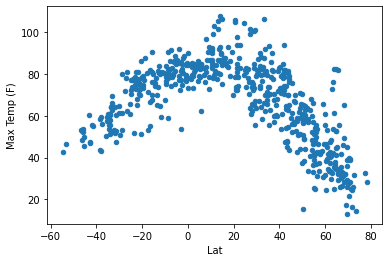

In [7]:
#create a scatter plot showing Temp and Lat
temp_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Max Temp (F)")
#the code is ploting points based on the Lat and Max Temp for each city

plt.savefig("temp_lat.png")

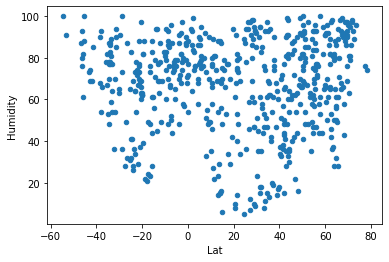

In [8]:
#create a scatter plot showing Humidity and Lat
hum_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Humidity")
#the code is plotting points based on the Lat and Humidity of each city

plt.savefig("hum_lat.png")

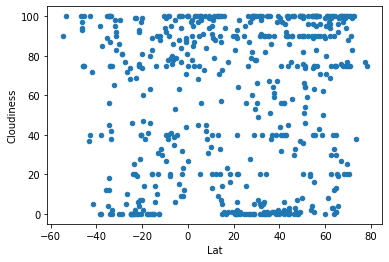

In [9]:
#create a scatter plot based on Cloudiness and Lat
cloud_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Cloudiness")
#the code is plotting points based on the Cloudiness and Lat of each city

plt.savefig("cloud_lat.png")

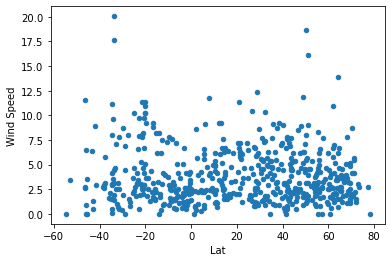

In [10]:
#create a scatter plot based on Wind Speed and Lat
wind_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Wind Speed")
#the code is plotting points based on the wind speed and lat of each city

plt.savefig("ws_lat.png")

as Lat increases (away from equator) the max temp falls


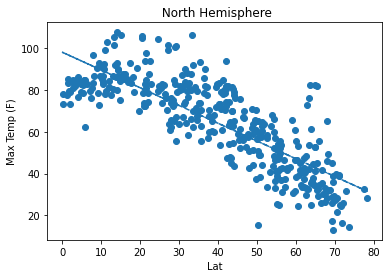

In [11]:
#make df for north and south hem
n_hem_df = weather_data_df.drop(weather_data_df[weather_data_df["Lat"] < 0].index)
s_hem_df = weather_data_df.drop(weather_data_df[weather_data_df["Lat"] >= 0].index)

#plot North Hem and Max Temp 
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,7]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,7].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title(" North Hemisphere")

print("as Lat increases (away from equator) the max temp falls")

plt.savefig("n_temp_lat.png")

as Lat increases (toward equator) the max temps increase
this shows it tends to be warmer close to the equator


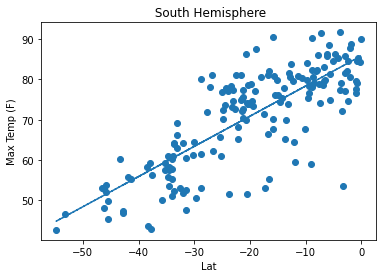

In [12]:
#plot South Hem and Max Temp
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,7]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,7].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title(" South Hemisphere")

print("as Lat increases (toward equator) the max temps increase")
print("this shows it tends to be warmer close to the equator")
plt.savefig("s_temp_lat.png")

as Lat increases so does Humidity but not to a signifigant amount


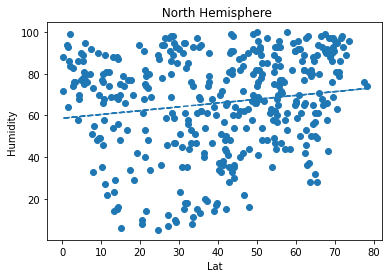

In [13]:
#plot North Hem and Humididty
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,4]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,4].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title(" North Hemisphere")

print("as Lat increases so does Humidity but not to a signifigant amount")
plt.savefig("n_hum_lat.png")

little to not corilation between Humidity and Lat


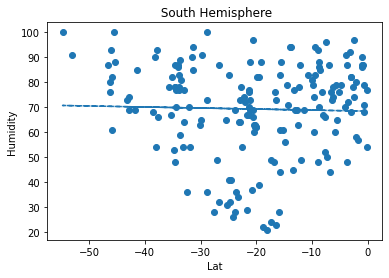

In [14]:
#plot South Hem and Humididty
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,4]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,4].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title(" South Hemisphere")


#as lat increases so does Humidity

print("little to not corilation between Humidity and Lat")

plt.savefig("s_hum_lat.png")

no corrilation between Cloudiness and Lat


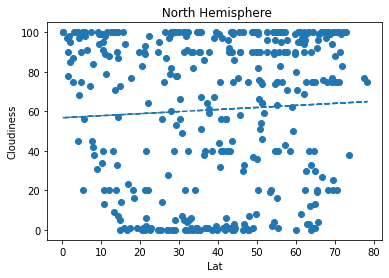

In [15]:
#plot North Hem and Cloudiness
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,1]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,1].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title(" North Hemisphere")
print("no corrilation between Cloudiness and Lat")
plt.savefig("n_cloud_lat.png")

no corrilation between Cloudiness and Lat


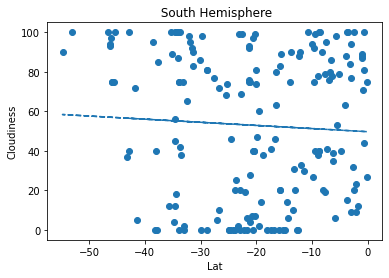

In [16]:
#plot South Hem and Cloudiness
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,1]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,1].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title(" South Hemisphere")

print("no corrilation between Cloudiness and Lat")
plt.savefig("s_cloud_lat.png")

no corrilation between Wind Speed and Lat


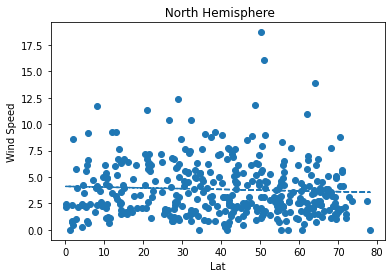

In [17]:
#plot North Hem and Wind Speed
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,8]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,8].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title(" North Hemisphere")

print("no corrilation between Wind Speed and Lat")
plt.savefig("n_wind_lat.png")

no corrilation between Wind Speed and Lat


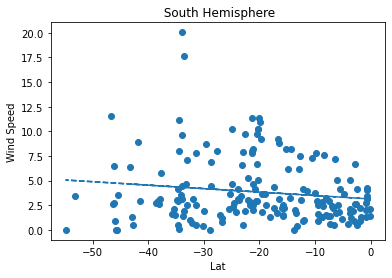

In [18]:
#plot South Hem and Wind Speed
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,8]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,8].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title(" South Hemisphere")

print("no corrilation between Wind Speed and Lat")
plt.savefig('s_wind_lat.png')